In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()
from dython import nominal
from dython import nominal

In [2]:
data = pd.read_csv('model_dat.csv')

In [3]:
data

,Brand,Year,Horsepower,Engine Cylinders,Number of Doors,Price
0,BMW,2011,335.0,6.0,2.0,46135
1,BMW,2011,300.0,6.0,2.0,40650
2,BMW,2011,300.0,6.0,2.0,36350
3,BMW,2011,230.0,6.0,2.0,29450
4,BMW,2011,230.0,6.0,2.0,34500
...,...,...,...,...,...,...
8614,Acura,2012,300.0,6.0,4.0,46120
8615,Acura,2012,300.0,6.0,4.0,56670
8616,Acura,2012,300.0,6.0,4.0,50620
8617,Acura,2013,300.0,6.0,4.0,50920


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8619 entries, 0 to 8618
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             8619 non-null   object 
 1   Year              8619 non-null   int64  
 2   Horsepower        8619 non-null   float64
 3   Engine Cylinders  8619 non-null   float64
 4   Number of Doors   8619 non-null   float64
 5   Price             8619 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 404.1+ KB


In [5]:
# Treating all the nominal variables at once using dummy variables
MLDATA=pd.get_dummies(data)

# Printing sample rows
MLDATA

,Year,Horsepower,Engine Cylinders,Number of Doors,Price,Brand_Acura,Brand_Alfa Romeo,Brand_Audi,Brand_BMW,Brand_Buick,...,Brand_Plymouth,Brand_Pontiac,Brand_Porsche,Brand_Saab,Brand_Scion,Brand_Subaru,Brand_Suzuki,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2011,335.0,6.0,2.0,46135,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,40650,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,36350,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,29450,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,34500,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8614,2012,300.0,6.0,4.0,46120,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8615,2012,300.0,6.0,4.0,56670,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8616,2012,300.0,6.0,4.0,50620,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8617,2013,300.0,6.0,4.0,50920,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Printing all the column names for our reference
MLDATA.columns

Index(['Year', 'Horsepower', 'Engine Cylinders', 'Number of Doors', 'Price',
       'Brand_Acura', 'Brand_Alfa Romeo', 'Brand_Audi', 'Brand_BMW',
       'Brand_Buick', 'Brand_Cadillac', 'Brand_Chevrolet', 'Brand_Chrysler',
       'Brand_Dodge', 'Brand_FIAT', 'Brand_Ford', 'Brand_GMC', 'Brand_Genesis',
       'Brand_HUMMER', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Infiniti',
       'Brand_Kia', 'Brand_Land Rover', 'Brand_Lexus', 'Brand_Lincoln',
       'Brand_Lotus', 'Brand_Maserati', 'Brand_Mazda', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Oldsmobile',
       'Brand_Plymouth', 'Brand_Pontiac', 'Brand_Porsche', 'Brand_Saab',
       'Brand_Scion', 'Brand_Subaru', 'Brand_Suzuki', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_Volvo'],
      dtype='object')

Intercept of Regression 	: b =  [-1007269.99298338]
Coefficients of Regression 	: a =  [[ 5.04298129e+02  9.62352524e+01  7.70815623e+02  5.09531881e+02
   4.04034664e+02  2.70981075e+04  8.77676143e+03  7.15797462e+03
  -1.85007376e+03  6.09930031e+03 -6.56674104e+03 -5.61259395e+03
  -1.06939806e+04 -5.49936528e+03 -6.26719574e+03 -5.33983180e+03
  -3.88527579e+03 -2.37929554e+03 -5.99691794e+03 -8.13957591e+03
   1.29918478e+01 -8.60873443e+03  9.19573070e+03  4.74908916e+03
   3.39597657e+03  2.72911795e+04  2.18045829e+04 -6.26407785e+03
   7.58689229e+03 -5.20422980e+03 -8.21323608e+03 -2.23228855e+03
  -1.36472786e+04 -6.50697881e+03  1.56921396e+04  3.08070379e+03
  -7.86394559e+03 -5.67166375e+03 -7.05560340e+03 -7.28093452e+03
  -2.93374290e+03  1.36809662e+03]]

             Predictors  Coefficients
0                  Year    504.298129
1            Horsepower     96.235252
2      Engine Cylinders    770.815623
3       Number of Doors    509.531881
4           Brand_Acura   

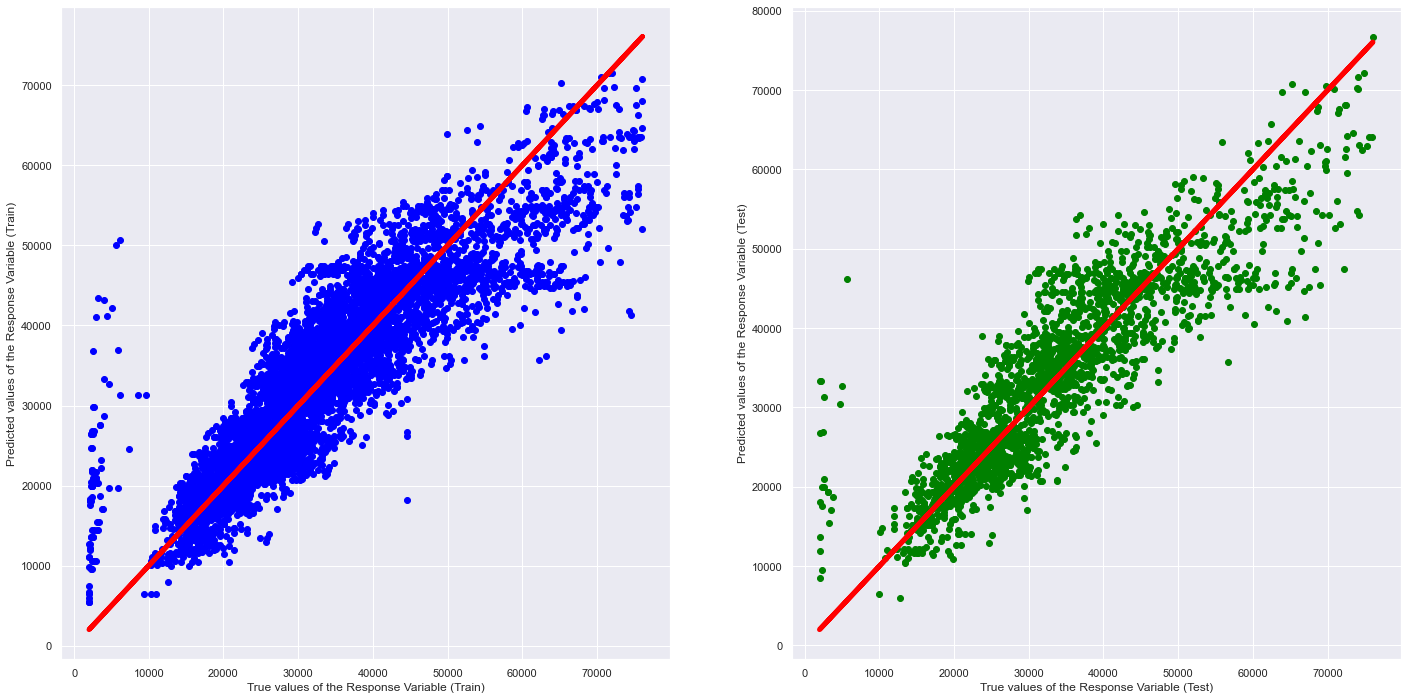

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7865269048876411
Mean Squared Error (MSE) 	: 37095198.6357827

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.791373049302089
Mean Squared Error (MSE) 	: 37341285.45556619



In [7]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
predictors = ['Year', 'Horsepower', 'Engine Cylinders', 'Number of Doors',
       'Brand_Acura', 'Brand_Alfa Romeo', 'Brand_Audi', 'Brand_BMW',
       'Brand_Buick', 'Brand_Cadillac', 'Brand_Chevrolet', 'Brand_Chrysler',
       'Brand_Dodge', 'Brand_FIAT', 'Brand_Ford', 'Brand_GMC', 'Brand_Genesis',
       'Brand_HUMMER', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Infiniti',
       'Brand_Kia', 'Brand_Land Rover', 'Brand_Lexus', 'Brand_Lincoln',
       'Brand_Lotus', 'Brand_Maserati', 'Brand_Mazda', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Oldsmobile',
       'Brand_Plymouth', 'Brand_Pontiac', 'Brand_Porsche', 'Brand_Saab',
       'Brand_Scion', 'Brand_Subaru', 'Brand_Suzuki', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_Volvo']

y = pd.DataFrame(MLDATA['Price'])
X = pd.DataFrame(MLDATA[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, color = 'red', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, color = 'red', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()